## We will work with an excerpt of human chromosome 1

In [1]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/chr1.GRCh38.excerpt.fasta

--2025-03-27 17:47:13--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/chr1.GRCh38.excerpt.fasta
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.175, 18.155.188.167, 18.155.188.170, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 810105 (791K) [application/octet-stream]
Saving to: ‘chr1.GRCh38.excerpt.fasta.3’

chr1.GRCh38.excerpt 100%[===================>] 791.12K  --.-KB/s    in 0.1s    

2025-03-27 17:47:13 (5.53 MB/s) - ‘chr1.GRCh38.excerpt.fasta.3’ saved [810105/810105]



In [2]:
def loadFasta(filename):
    f = open(filename)
    name = ''
    dna = ''
    
    for line in f:
        if line[0] == '>':
            name = line[1:].rstrip()
            
        else:
            dna += line.rstrip()
    return name, dna

In [3]:
file = 'chr1.GRCh38.excerpt.fasta'
chromosome_name, chromosome_dna = loadFasta(file)

In [4]:
def editDistance(x, y):
    # Create distance matrix
    D = []
    for i in range(len(x)+1):
        D.append([0]*(len(y)+1))
    # Initialize first row and column of matrix
    for i in range(len(x)+1):
        D[i][0] = i
    for i in range(len(y)+1):
        D[0][i] = 0
    # Fill in the rest of the matrix
    for i in range(1, len(x)+1):
        for j in range(1, len(y)+1):
            distHor = D[i][j-1] + 1
            distVer = D[i-1][j] + 1
            if x[i-1] == y[j-1]:
                distDiag = D[i-1][j-1]
            else:
                distDiag = D[i-1][j-1] + 1
            D[i][j] = min(distHor, distVer, distDiag)
    # Edit distance is the value in the bottom right corner of the matrix
    distance = D[-1]
    distance.sort()
    return distance[0]


#### What is the edit distance of the best match between pattern GCTGATCGATCGTACG and the excerpt of human chromosome 1? (Don't consider reverse complements.)

In [5]:
%%time
p1 = 'GCTGATCGATCGTACG'
p2 = 'GATTTACCAGATTGAG'
print(f"overlap for {p1} = ", editDistance(p1, chromosome_dna))
print(f"overlap for {p2} = ", editDistance(p2, chromosome_dna))

overlap for GCTGATCGATCGTACG =  3
overlap for GATTTACCAGATTGAG =  2
CPU times: user 8.4 s, sys: 71.6 ms, total: 8.48 s
Wall time: 8.74 s


In [6]:
def overlap(a, b, min_length=3):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's prefix in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match


from itertools import permutations
def overlap(a, b, min_length=3):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's prefix in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match

def naive_overlap_map(reads, k):
    olaps = {}
    for a, b in permutations(reads, 2):
        olen = overlap(a, b, min_length=k)
        if olen > 0:
            olaps[(a, b)] = olen
    return olaps


def readFASTQ(filename):    
    f = open(filename)
    reads = []
    while True:
        h = f.readline()
        if len(h) == 0:
            break
        sequence = f.readline().rstrip()
        _ = f.readline()
        quality = f.readline().rstrip()
        reads.append(sequence)
        
    return reads

def naive_overlap_faster(reads, k):
    olaps = {}
    kmer_dict = {}
    
    for read in reads:
        for i in range(len(read)-k+1):
            kmer_dict[read[i:i+k]] = set()
            
    for read in reads:
        for i in range(len(read)-k+1):
            kmer_dict[read[i:i+k]].add(read)
     
    effective_read = []
    
    for read in reads:
        current_kmer_set = kmer_dict[read[-1*k:]]
        for kmer_read in current_kmer_set:
            if read != kmer_read:
                olen = overlap(read, kmer_read, min_length=k)                
            if olen > 0:
                olaps[(read, kmer_read)] = olen
            olen = 0
    return olaps       

In [7]:
%%time
overlaps = naive_overlap_map(reads, 30)
print("Length of overlap =", len(overlaps))

NameError: name 'reads' is not defined

In [8]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.for_asm.fastq

--2025-03-27 17:47:22--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.for_asm.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.175, 18.155.188.167, 18.155.188.170, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2562951 (2.4M) [application/octet-stream]
Saving to: ‘ERR266411_1.for_asm.fastq.2’

ERR266411_1.for_asm 100%[===================>]   2.44M  12.2MB/s    in 0.2s    

2025-03-27 17:47:23 (12.2 MB/s) - ‘ERR266411_1.for_asm.fastq.2’ saved [2562951/2562951]



In [9]:
file = 'ERR266411_1.for_asm.fastq'
reads = readFASTQ(file)

In [10]:
%%time
overlaps = naive_overlap_faster(reads, 30)
print("Length of overlap =", len(overlaps))

Length of overlap = 904746
CPU times: user 1.41 s, sys: 39.1 ms, total: 1.45 s
Wall time: 1.47 s


In [11]:
# Run this only if you need to install networkX
# !pip install networkx

The plot is a network visualization of a subset of the overlap graph. In this graph:

Nodes represent individual sequencing reads.

Directed edges represent an overlap between two reads (from read A to read B, meaning the suffix of A overlaps the prefix of B by at least the specified number of bases).

Edge weights (though not always explicitly shown) correspond to the length of the overlap.

Since we’re visualizing a random subset (in this case, 100 nodes) of the entire graph, the diagram shows a smaller, manageable portion of the overall overlap structure, giving you an idea of how reads are connected through overlaps in the dataset.

In [19]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
import matplotlib
matplotlib.pyplot.rc('text', usetex=True)

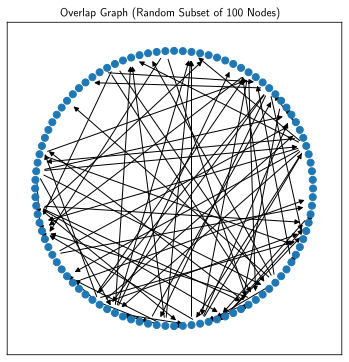

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def build_overlap_graph(overlap_map):
    """
    Build an overlap graph from an overlap map.
    
    Args:
        overlap_map (dict): A dictionary where keys are tuples (a, b) representing overlapping reads,
                            and values are the overlap lengths.
    
    Returns:
        networkx.DiGraph: A directed graph representing the overlap relationships.
    """
    G = nx.DiGraph()
    for (a, b), olen in overlap_map.items():
        G.add_edge(a, b, weight=olen)
    return G

# Assuming 'overlaps' is your precomputed overlap map:
G = build_overlap_graph(overlaps)

# Option 2: Visualize a random subset of nodes (e.g., 100 nodes)
num_nodes = 100
num_nodes_to_sample = num_nodes
if len(G.nodes) > num_nodes_to_sample:
    sub_nodes = random.sample(list(G.nodes), num_nodes_to_sample)
    subG = G.subgraph(sub_nodes)
else:
    subG = G

plt.figure(figsize=(6, 6))
# Use a simpler layout for speed; shell layout is typically fast.
pos = nx.shell_layout(subG)
nx.draw_networkx_nodes(subG, pos, node_size=50)
nx.draw_networkx_edges(subG, pos, arrowsize=10)
plt.title(f"Overlap Graph (Random Subset of {num_nodes} Nodes)")
plt.axis()
plt.show()

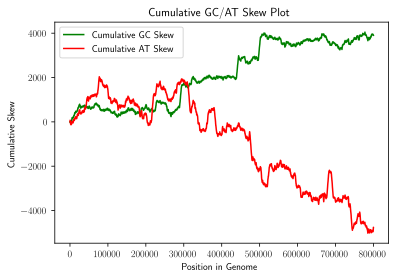

In [22]:
import matplotlib.pyplot as plt

def cumulative_skew(sequence):
    """
    Compute cumulative GC skew and AT skew for a DNA sequence.
    
    For GC skew, add +1 for each G and -1 for each C.
    For AT skew, add +1 for each A and -1 for each T.
    
    Args:
        sequence (str): The DNA sequence.
        
    Returns:
        tuple: Two lists representing the cumulative GC skew and cumulative AT skew.
    """
    gc_skew = [0]
    at_skew = [0]
    for base in sequence:
        # Update GC skew
        if base.upper() == 'G':
            gc_skew.append(gc_skew[-1] + 1)
        elif base.upper() == 'C':
            gc_skew.append(gc_skew[-1] - 1)
        else:
            gc_skew.append(gc_skew[-1])
        
        # Update AT skew
        if base.upper() == 'A':
            at_skew.append(at_skew[-1] + 1)
        elif base.upper() == 'T':
            at_skew.append(at_skew[-1] - 1)
        else:
            at_skew.append(at_skew[-1])
    
    return gc_skew, at_skew

# Example usage:
# Assume chromosome_dna is already loaded from a FASTA file.
# For example, using: chromosome_name, chromosome_dna = optimized_load_fasta(filename)
chromosome_dna = "AGCTTCGATCGATCGATCGCTAGCTAGCTAGCTGACT"  # Replace with your actual sequence, this is an example
file = 'chr1.GRCh38.excerpt.fasta'
chromosome_name, chromosome_dna = loadFasta(file)

gc_skew, at_skew = cumulative_skew(chromosome_dna)

plt.figure(figsize=(6, 4))
plt.plot(gc_skew, label='Cumulative GC Skew', color='green')
plt.plot(at_skew, label='Cumulative AT Skew', color='red')
plt.xlabel("Position in Genome")
plt.ylabel("Cumulative Skew")
plt.title("Cumulative GC/AT Skew Plot")
plt.legend()
plt.grid(False)
plt.show()


In [24]:
# !pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 34.0 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 15.1 MB/s eta 0:00:00
You should consider upgrading via the '/Users/asheshghosh/.pyenv/versions/3.9.12/bin/python3.9 -m pip install --upgrade pip' command.


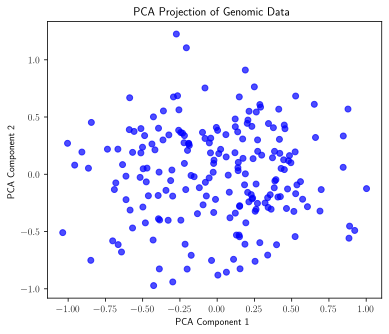

/Users/asheshghosh/.pyenv/versions/3.9.12/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


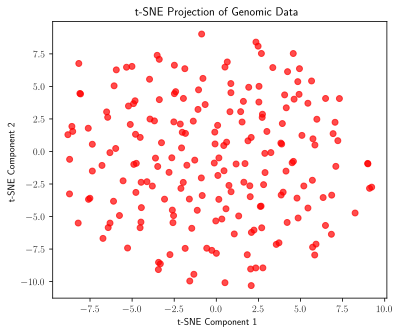

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Simulate a feature matrix for demonstration purposes.
# In practice, replace this with your actual genomic feature matrix.
num_samples = 200    # e.g., number of reads
num_features = 50    # e.g., k-mer frequency counts
np.random.seed(42)
feature_matrix = np.random.rand(num_samples, num_features)

# --- PCA Projection ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(feature_matrix)

plt.figure(figsize=(6, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Genomic Data")
plt.grid(False)
plt.show()

# --- t-SNE Projection ---
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(feature_matrix)

plt.figure(figsize=(6, 5))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='red', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection of Genomic Data")
plt.grid(False)
plt.show()
